This notebook uses the LineDetection class to retrieve the coordinates of streaks in images. The purpose of this notebook is to provide an experimentation space to use that class structure and apply it on various images. 

You must have the line_detection.py file in the same folder as this notebook. Additionally, you should have a "Data" folder containing the images that you want to analyze. So far, this code has been tested on 8 images obtained from the following source:

https://epyc.astro.washington.edu/~dinob/dssg/



In [53]:
#Import the module and other libraries
import line_detection_updated as ld
#import image_rotation
from astropy.io import fits
import astropy.visualization as aviz

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np


from IPython.lib.deepreload import reload
%load_ext autoreload
%autoreload 2



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
#Set user filepath
'''
Since multiple people are using this file and we may have different filepaths, please set the filepath here. Filepath is basically a string that denotes which folder you want to navigate to. 
So if your datasets are in a folder called Images inside a folder called Home, then you can write current_user_filepath = 'Home/Images'

Please comment out the other users' filepaths, do not delete it. 

For example  --> img1 = fits.open(current_user_filepath + '/calexp-0941420_07.fits', cache = True)

'''
current_user_filepath = 'Data'





In [55]:
#Import your data
'''
I am pasting 8 images that I worked with to write this code. 
But you can use this format to import any image you want
'''

img1 = fits.open(current_user_filepath + '/calexp-0941420_07.fits', cache = True)
img2 = fits.open(current_user_filepath +'/calexp-0941422_33.fits', cache = True)
img3 = fits.open(current_user_filepath +'/calexp-0941424_34.fits', cache = True)
img4 = fits.open(current_user_filepath +'/calexp-0941426_16.fits', cache = True)
img5 = fits.open(current_user_filepath +'/calexp-0941424_37.fits', cache = True)
img6 = fits.open(current_user_filepath +'/STARLINK-1892-20220305200929.fits',cache = True)
img7 = fits.open(current_user_filepath +'/STARLINK-1892-N-20220305200959.fits',cache = True)
img8 = fits.open(current_user_filepath +'/STARLINK-1905-20220305191929.fits',cache = True)
img_multiple_streaks = fits.open(current_user_filepath + '/bi327715.fits', cache=True )


In [56]:
#Set up your image data
'''
Note:
Please check where the data actually lies in the fits file. You can do that my typing img1.info()
Usually, the image is in the first element i.e. img1[0], but in many cases it can be in the 
2nd element i.e. img1[1]. So before applying the line detection class, make sure your img_data
actually has data

These 2 lines are the code you should change when you want to work with a different image.
'''
#img_data = img6[0].data
img_data = img_multiple_streaks[0].data
img_data_copy = img_data.copy()



In [57]:
#Importing the class
detector = ld.LineDetection()




In [58]:
detector.image = img_data_copy

'''
OPTIONAL:

detector.mask = True
detector.erode = False
detector.erode_threshold = 5
detector.mask_percent = 0.2
detector.nstd1_cut = 2
detector.nstd2_binary_cut = 0.5
detector.threshold = 0.12

''' 




'\nOPTIONAL:\n\ndetector.mask = True\ndetector.erode = False\ndetector.erode_threshold = 5\ndetector.mask_percent = 0.2\ndetector.nstd1_cut = 2\ndetector.nstd2_binary_cut = 0.5\ndetector.threshold = 0.12\n\n'

Found 12 lines.


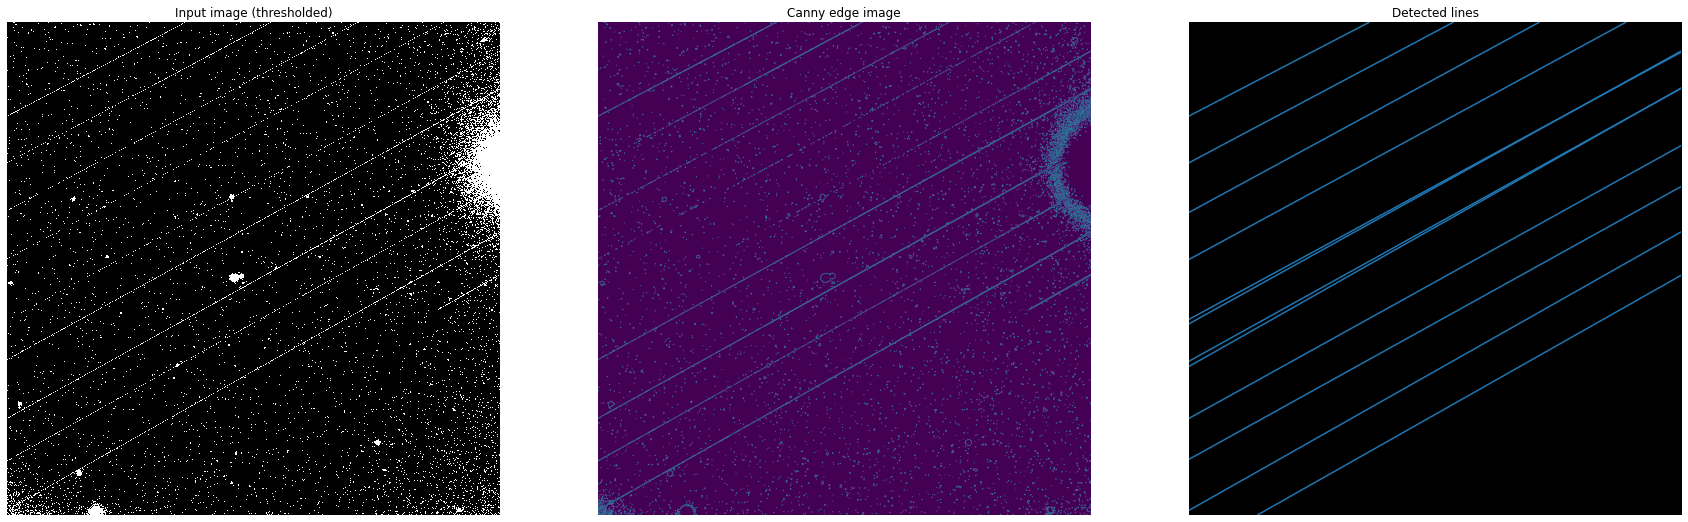

In [59]:
#Conduct the line detection
lines, angles, cart_coords, thresholded_image, blurred_image, edges = detector.hough_transformation()

#Visualize input image and detected lines
fig, axes = plt.subplots(1, 3, figsize=(30, 30))
ax = axes.ravel()

ld.show(thresholded_image, cmap="gray", ax=ax[0], interpolation="none")
ax[0].set_title('Input image (thresholded)')
ax[0].set_axis_off()

ld.show(edges, ax=ax[1])
ax[1].set_title('Canny edge image')
ax[1].set_axis_off()

#Detected lines
blank_image = np.zeros(detector.image.shape)

ld.show(blank_image, cmap="gray", ax=ax[2])

ax[2].set_axis_off()
ax[2].set_title('Detected lines')

for i in range(len(cart_coords)):
    ax[2].axline(cart_coords[i], slope=np.tan(angles[i] + np.pi/2))


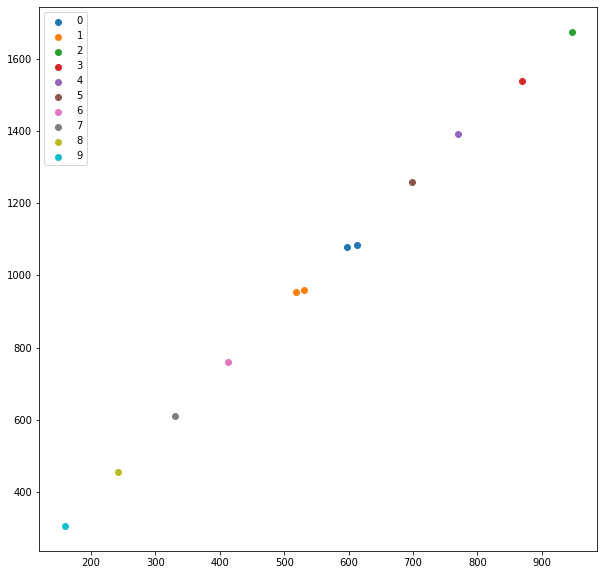

In [60]:
#Clustering the detected lines
clustered_lines = ld.cluster(cart_coords, lines)

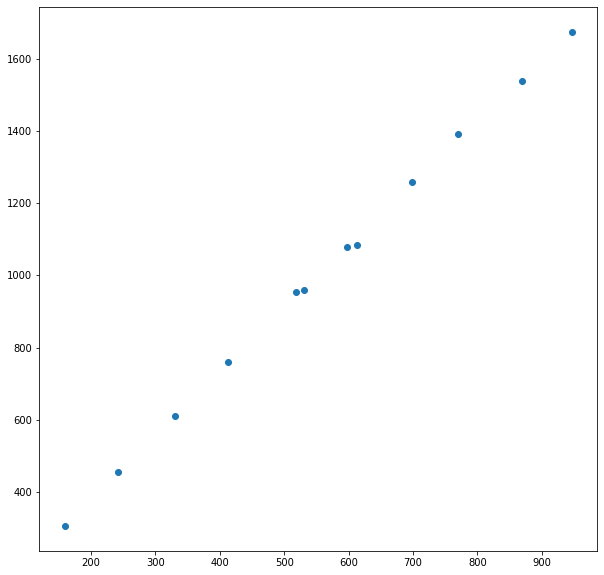

In [15]:
cart_coords_array = np.array(cart_coords)
plt.scatter(cart_coords_array[:,0],cart_coords_array[:,1])